In [41]:
import ast
from IPython.display import display, SVG
from graphviz import Digraph

In [72]:
node_style = {
    ast.Module: dict(
        style='filled',
        fillcolor='yellow',
        shape='box'
    ),

    ast.Expression: dict(
        style='invisible',
    ),

    ast.Interactive: dict(
        style='filled',
        fillcolor='green',
        shape='Ellipse'
    )
}

general_style = dict(
    fontsize='10'
)

In [82]:
def show_tree(code: str, output_filename: str=None):
    """
    display abstract syntax tree in IPython
    using graphviz
    """
    
    def add_node(graph: Digraph, node: ast.AST, parent: ast.AST=None):
        """
        add single node (and its children recursively) to syntax tree
        """
        class_name = type(node).__name__

        name = None
        for attr in ['arg', 'name', 'id']:
            if hasattr(node, attr):
                name = getattr(node, attr).__str__()
            

        # get top-level class
        top_class = type(node)
        while hasattr(top_class, 'super'):
            top_class = top_class.super()

        graph.node(
            id(node).__str__(),
            class_name + (('\n' + name) if name is not None else ''),
            #**node_style.get(top_class),
            #**general_style
        )

        if parent:
            graph.edge(id(parent).__str__(), id(node).__str__())
        for child in ast.iter_child_nodes(node):
            add_node(graph, child, node)

    graph = Digraph()
    add_node(graph, ast.parse(code))
    display(SVG(graph.pipe(format='svg')))

    if output_filename is not None:
        graph.render(output_filename, format='png')

In [85]:
code = \
'''
new_lambda = lambda x: x + 1
'''

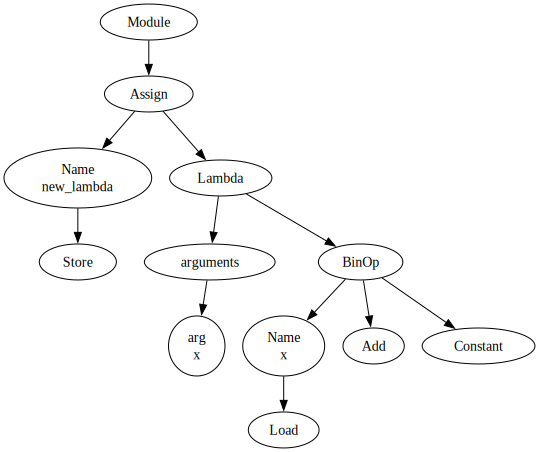

In [86]:
show_tree(code)

In [87]:
code = \
'''
class A(ast.AST):
    def __init__(self):
        pass
'''

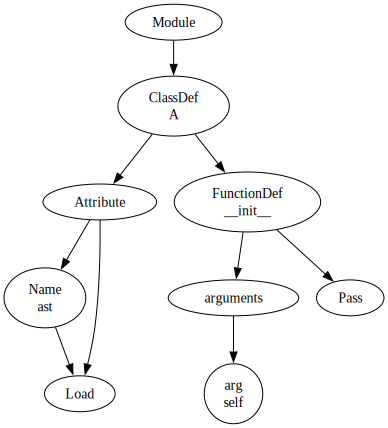

In [88]:
show_tree(code)